# Numpy

Adapted from [CS231n Python tutorial](https://cs231n.github.io/python-numpy-tutorial/) by Justin Johnson, and several notebooks provided by [Bartosz Teleńczuk](https://datascience.telenczuk.pl/teaching/)

## What is NumPy?

[Numpy](http://www.numpy.org/) is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays.

* memory-efficient container for multi-dimensional homogeneous (mainly numerical) data (NumPy array)

* fast vectorised operations on arrays

* library general purpose functions: data reading/writing, linear algebra, FFT etc. (for more wait for SciPy lecture)

* main applications: signal processing, image processing, analysis of raw data from measurment instruments


If you are already familiar with MATLAB, you might find this [tutorial](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html) useful to get started with Numpy.

## Importing Numpy

In [2]:
import numpy as np

In [3]:
new_array = np.array([1, 2, 3, 4])
print(new_array)

[1 2 3 4]


### Exercise

Create the following array and store in a new variable called `a`:

```
[0, 5, 8, 10]
```

### Exercise

Create the following rank 2 array with shape (3, 4) in a new variable called `b`
```
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
```

## Loading data

We are studying inflammation in patients who have been given a new treatment for arthritis, and need to analyze the first dozen data sets of their daily inflammation. The data sets are stored in comma-separated values (CSV) format: each row holds information for a single patient, and the columns represent successive days. The first few rows of our first file look like this:

In [ ]:
np.load?

In [ ]:
np.load??

Use of the Tab complete. Try np.load+Tab

In [4]:
np.loadtxt?

In [5]:
data = np.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

## Explore array

In [6]:
print(data)

[[0. 0. 1. ... 3. 0. 0.]
 [0. 1. 2. ... 1. 0. 1.]
 [0. 1. 1. ... 2. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 1. ... 1. 1. 0.]]


In [ ]:
print(data.dtype)
print(data.shape)

We can plot the data using `matplotlib` library:

In [7]:
import matplotlib.pyplot as plt
plt.matshow(data)
plt.show()

Note that the figure appears only after you call `plt.show()` function. In Jupyter notebook you can show figure directly in the notebook using this command:

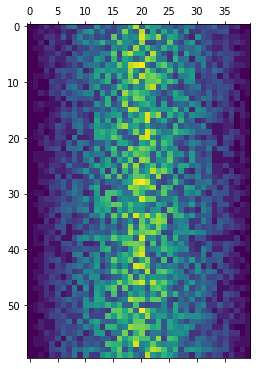

In [8]:
%matplotlib inline
plt.matshow(data)

## Indexing

Note that the NumPy arrays are zero-indexed:

In [9]:
data[0, 0]

0.0

It means that that the third element in the first row has an index of [0, 2]:

In [10]:
data[0, 2]

1.0

We can also assign the element with a new value:

In [11]:
data[0, 2] = 100.
print(data[0, 2])

100.0


NumPy (and Python in general) checks the bounds of the array:

In [12]:
print(data.shape)
data[60, 0]

(60, 40)


IndexError: index 60 is out of bounds for axis 0 with size 60

Finally, we can ask for several elements at once:

In [13]:
data[0, [0, 10]]

array([0., 3.])

## Slices

You can select ranges of elements using slices. To select first two columns from the first row, you can use:

In [ ]:
data[0, 0:2]

Note that the returned array does not include third column (with index 2).

You can skip the first or last index (which means, take the values from the beginning or to the end):

In [ ]:
data[0, :2]

If you omit both indices in the slice leaving out only the colon (`:`), you will get all columns of this row:

In [ ]:
data[0, :]

We now can plot the values in this row as a line plot:

In [ ]:
plt.plot(data[0, :])

### Exercise

Use slicing to pull out the subarray `c` of the `b` array above, 
consisting of the first 2 rows
and columns 1 and 2; `c` is the following array of shape (2, 2):
```
[[2 3]
 [6 7]]
```

## Mixing indexing and slicing

You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different for example from the way that MATLAB handles array slicing:

Create the following rank 2 array with shape (3, 4)
```
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
```

In [ ]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [ ]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)  # Prints "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape)  # Prints "[[5 6 7 8]] (1, 4)"

We can make the same distinction when accessing columns of an array:

In [ ]:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]

print(col_r1, col_r1.shape)  # Prints "[ 2  6 10] (3,)"

print(col_r2, col_r2.shape)  # Prints "[[ 2]
                             #          [ 6]
                             #          [10]] (3, 1)"

## Fancy indexing

In [ ]:
t = np.array([-2, 3, 4, -5, 5])
print(t)

Apart from indexing with integers and slices NumPy also supports indexing with arrays of integers (so-called *fancy indexing*). For example, to get the 2nd and 4th element of ``t``:

In [ ]:
t[[1, 3]]

## Boolean indexing

To select data fulfilling specific criteria, one can use the *bolean indexing*. This is best illustrated on 1D arrays; for example, lets select only positive elements of ``t``:


In [ ]:
t[t > 0]

Note that the index array has the same size as and type of boolean:

In [ ]:
print(t)
print(t > 0)

Multiple criteria can be also combine in one query:

In [ ]:
t[(t > 0) & (t < 5)]

### Exercise

Select all odd numbers from the array `t`

### Exercise

Select **negative** odd numbers from the array `t`

## Filtering data

It's also possible to select elements (filter) based on a condition. For example, to select all measurments above 10 in the first patient we can use:

In [14]:
patient_data = data[0, :]
patient_data[patient_data>10]

array([100.,  12.,  18.,  13.,  11.,  11.])

We can also substitute the measurement with a new value:


In [15]:
patient_data[patient_data>10] = 10
print(patient_data)

[ 0.  0. 10.  3.  1.  2.  4.  7.  8.  3.  3.  3. 10.  5.  7.  4.  7.  7.
 10. 10.  6. 10. 10. 10.  7.  7.  4.  6.  8.  8.  4.  4.  5.  7.  3.  4.
  2.  3.  0.  0.]


<div class="alert alert-warning">
**Warning**

Please note that changing `patient_data` in the previous example, will also modify the original `data` array from which the row was extracted. The reason is that taking a slice does not copy a data, only gives a new view on it. 
</div>

### Quiz 

Imagine the following array `a`:

```
>> print(a)
[0, 5, 8, 10]
```

Which of the following commands will give this output:

```
[5, 8]
```

a) `print(a[1, 2])`

b) `print(a[2:3])`

c) `print(a[1:2])`

d) `print(a[[1, 2]])`

e) `print(a[a<10])`

You can test your guess by creating the `a` array:

```
a = np.array([0, 5, 8, 10])
```

## Operations

By default additions/subtractions/etc. are elementwise:

In [16]:
doubledata = data + data
print(doubledata)

[[ 0.  0. 20. ...  6.  0.  0.]
 [ 0.  2.  4. ...  2.  0.  2.]
 [ 0.  2.  2. ...  4.  2.  2.]
 ...
 [ 0.  2.  2. ...  2.  2.  2.]
 [ 0.  0.  0. ...  0.  4.  0.]
 [ 0.  0.  2. ...  2.  2.  0.]]


Operations by scalar:

In [17]:
tripledata = data * 3
print(tripledata)

[[ 0.  0. 30. ...  9.  0.  0.]
 [ 0.  3.  6. ...  3.  0.  3.]
 [ 0.  3.  3. ...  6.  3.  3.]
 ...
 [ 0.  3.  3. ...  3.  3.  3.]
 [ 0.  0.  0. ...  0.  6.  0.]
 [ 0.  0.  3. ...  3.  3.  0.]]


Some functions can be applied elementwise:

In [22]:
expdata = np.exp(data)
print(expdata)

[[1.00000000e+00 1.00000000e+00 2.20264658e+04 ... 2.00855369e+01
  1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.71828183e+00 7.38905610e+00 ... 2.71828183e+00
  1.00000000e+00 2.71828183e+00]
 [1.00000000e+00 2.71828183e+00 2.71828183e+00 ... 7.38905610e+00
  2.71828183e+00 2.71828183e+00]
 ...
 [1.00000000e+00 2.71828183e+00 2.71828183e+00 ... 2.71828183e+00
  2.71828183e+00 2.71828183e+00]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  7.38905610e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 2.71828183e+00 ... 2.71828183e+00
  2.71828183e+00 1.00000000e+00]]


<div class="alert alert-warning">
**Warning**

Standard Python installation also includes the `math` library, but it does not play nicely with NumPy array, so avoid using it with NumPy arrays.
</div>

Some functions (such as mean, max, etc.) aggregate the data return arrays of less dimensions or scalars:

In [19]:
meandata = np.mean(data)
print(meandata)

6.14625


By default the NumPy `mean` function It's also possbile to average over a single axis:

In [23]:
np.mean(data, axis=0)

array([ 0.        ,  0.45      ,  1.26666667,  1.75      ,  2.43333333,
        3.15      ,  3.8       ,  3.88333333,  5.23333333,  5.51666667,
        5.95      ,  5.9       ,  8.35      ,  7.73333333,  8.36666667,
        9.5       ,  9.58333333, 10.63333333, 11.53333333, 12.21666667,
       13.25      , 11.91666667, 11.01666667, 10.15      , 10.        ,
        8.66666667,  9.15      ,  7.25      ,  7.33333333,  6.58333333,
        6.06666667,  5.95      ,  5.11666667,  3.6       ,  3.3       ,
        3.56666667,  2.48333333,  1.5       ,  1.13333333,  0.56666667])

### Exercise

Average the inflammation data over the first ten patients (rows) and plot them across time (columns). Then repeat it for the next ten patients and so on. Try putting all averages on a single plot.

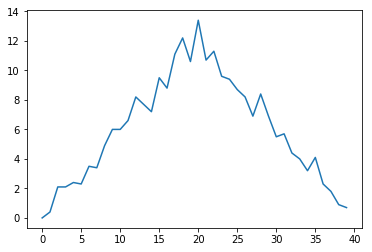

In [33]:
plt.plot(np.mean(data[0:10, :],axis=0))


In [35]:
for i in range 6:
    plt.plot(np.mean(data[10*i:10*(i+1),:],axis=0))

SyntaxError: invalid syntax (<ipython-input-35-31c84061e23d>, line 1)

In [28]:
avinfl2nd=np.mean(data[10:19])
print(avinfl2nd)

6.019444444444445


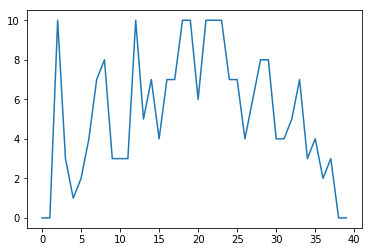

In [25]:
plt.plot(data[0,:])

## Broadcasting

It’s possible to do operations on arrays of different sizes. In some cases NumPy can transform these arrays automatically so that they behave like same-sized arrays. This conversion is called **broadcasting**. 

![numpy broadcasting in 2D. Copyright: Emmanuelle Gouillart, Didrik Pinte, Gaël Varoquaux, and Pauli Virtanen](./img/numpy_broadcasting.png)

For example we can 

In [21]:
data - np.mean(data, 0)

array([[ 0.        , -0.45      ,  8.73333333, ...,  1.5       ,
        -1.13333333, -0.56666667],
       [ 0.        ,  0.55      ,  0.73333333, ..., -0.5       ,
        -1.13333333,  0.43333333],
       [ 0.        ,  0.55      , -0.26666667, ...,  0.5       ,
        -0.13333333,  0.43333333],
       ...,
       [ 0.        ,  0.55      , -0.26666667, ..., -0.5       ,
        -0.13333333,  0.43333333],
       [ 0.        , -0.45      , -1.26666667, ..., -1.5       ,
         0.86666667, -0.56666667],
       [ 0.        , -0.45      , -0.26666667, ..., -0.5       ,
        -0.13333333, -0.56666667]])

### Exercise

Given the following array:

``a = np.array([[2, 3, 1], [4, 1, 1]])``

For each column of a subtract mean across rows. Next, from each row subtract its mean across columns.

**Tip**: You can use `a.T` to transpose the array.

## Extra Exercises

Review some basic operations:

- Create a vector with values ranging from 10 to 49
- Create a null vector of size 100 but the fifth value which is 1
- Reverse a vector (first element becomes last)
- Create a 3x3 matrix with values ranging from 0 to 8
- Create a 3x3 identity matrix
- Create a 2d array with 1 on the border and 0 inside
- Given a 1D array, negate all elements which are between 3 and 8, in place

For a more complete list, you can have a look at the 100 [Numpy Exercises](https://github.com/rougier/numpy-100).

### Quiz: 

What is the result of the following expression?

- print(0 * np.nan)
- print(np.nan == np.nan)
- print(np.inf > np.nan)
- print(np.nan - np.nan)
- print(0.3 == 3 * 0.1)